In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

In [13]:
#Importing Data

df = pd.read_excel('./data/WHR.xls')
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [15]:
# Check total missing values for each columns
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [16]:
#dealing with missing values. Imputing withh mean or median values


df['Log GDP per capita'] = df['Log GDP per capita'].fillna(df['Log GDP per capita'].mean())

df['Social support'] = df['Social support'].fillna(df['Social support'].mean())

df['Healthy life expectancy at birth'] = df['Healthy life expectancy at birth'].fillna(df['Healthy life expectancy at birth'].mean())

df['Freedom to make life choices'] = df['Freedom to make life choices'].fillna(df['Freedom to make life choices'].mean())

df['Generosity'] = df['Generosity'].fillna(df['Generosity'].mean())

df['Perceptions of corruption'] = df['Perceptions of corruption'].fillna(df['Perceptions of corruption'].mean())

df['Positive affect'] = df['Positive affect'].fillna(df['Positive affect'].mean())

df['Negative affect'] = df['Negative affect'].fillna(df['Negative affect'].mean())



In [17]:
df.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

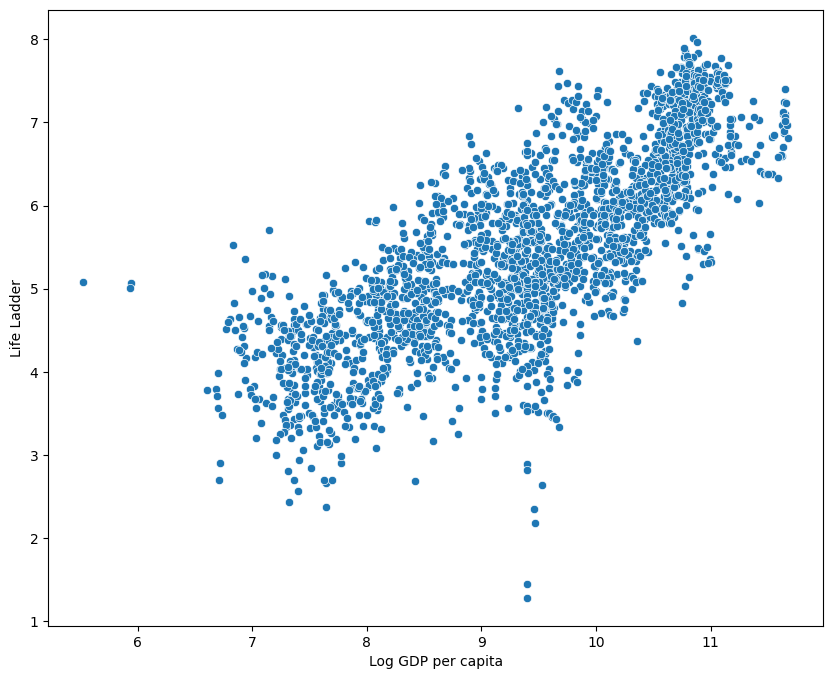

In [18]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Log GDP per capita', y = 'Life Ladder', data=df)
plt.show()

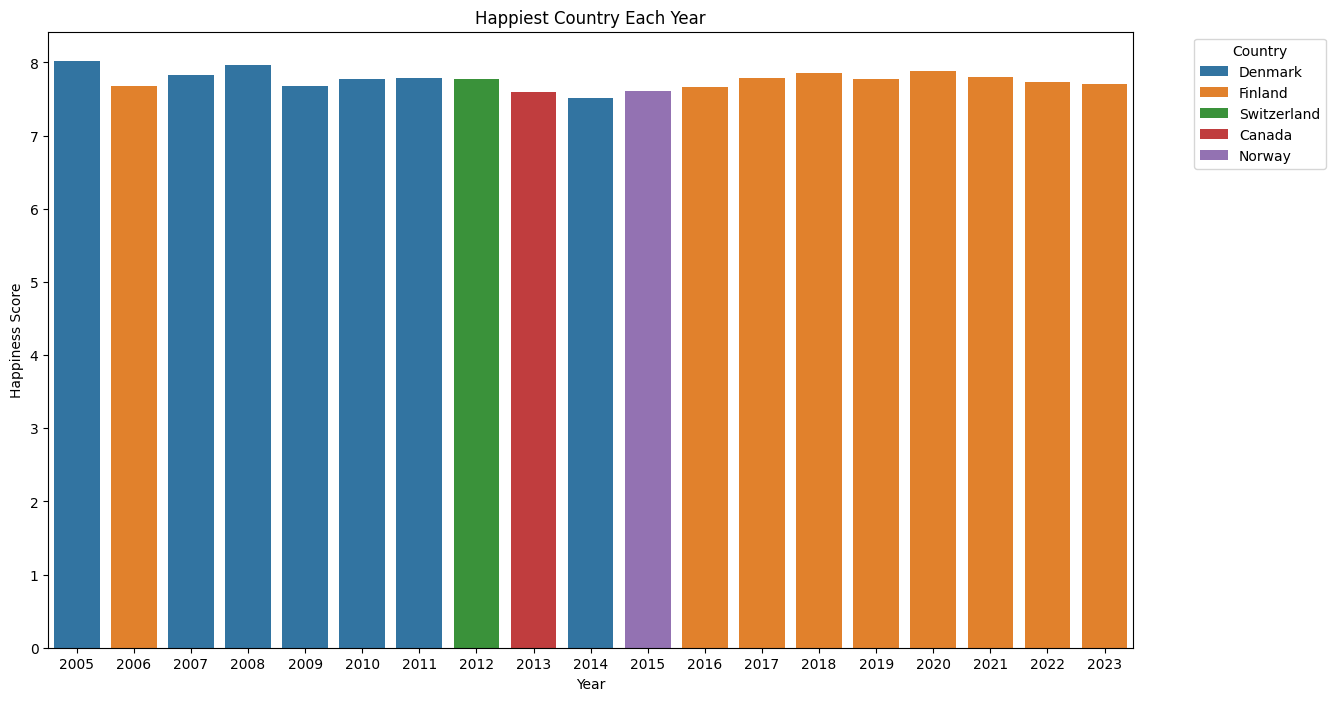

In [19]:
happiest_countries = df.loc[df.groupby('year')['Life Ladder'].idxmax()]

# Visualize the happiest country each year
plt.figure(figsize=(14, 8))
sns.barplot(data=happiest_countries, x='year', y='Life Ladder', hue='Country name', dodge=False)
plt.title('Happiest Country Each Year')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

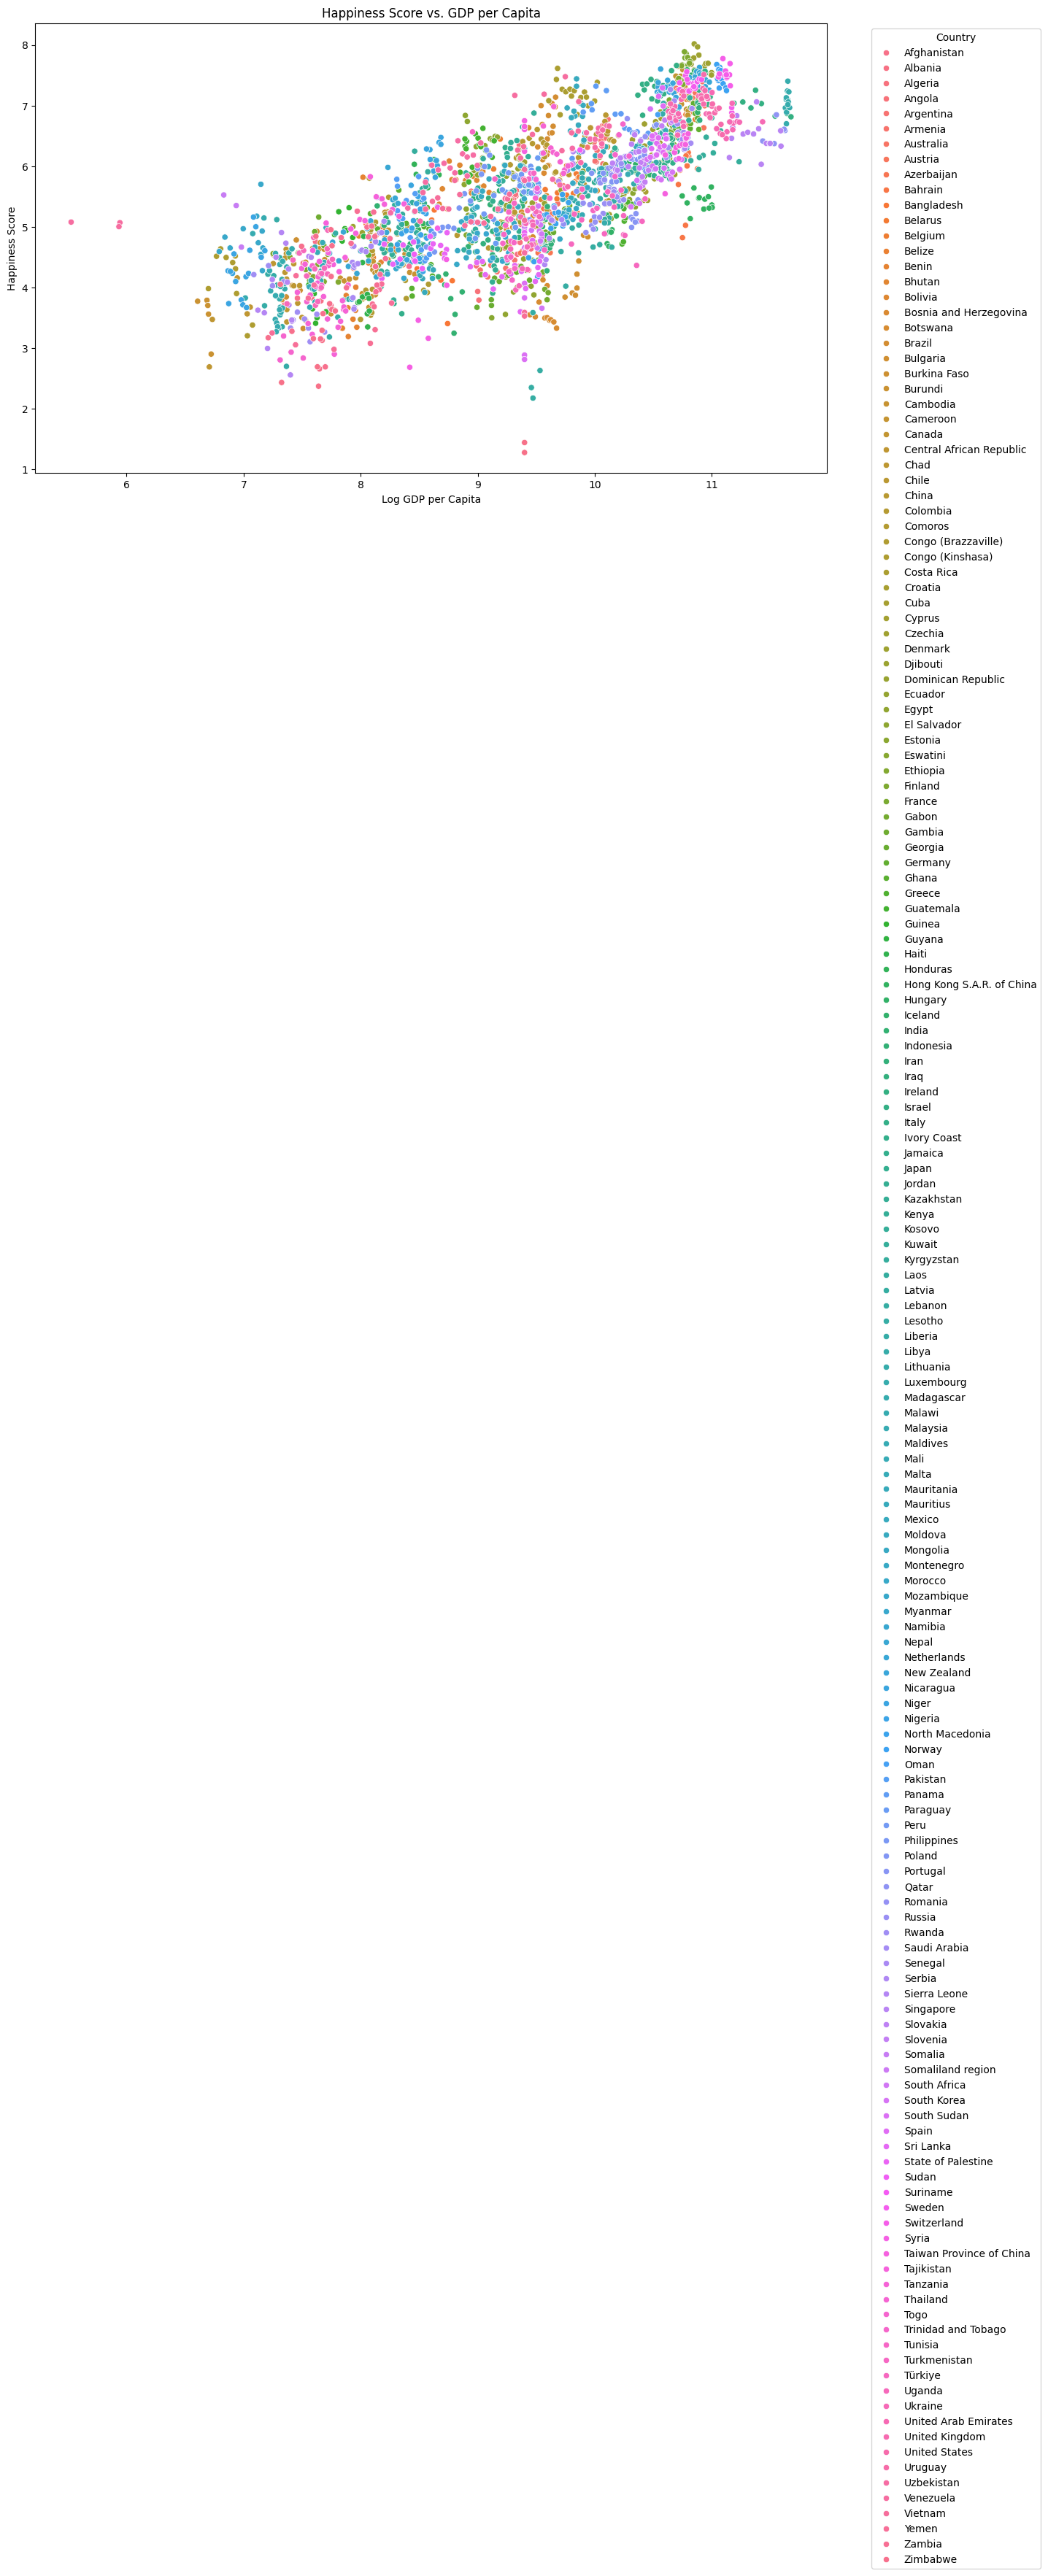

In [20]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='Log GDP per capita', y='Life Ladder', hue='Country name', legend=True)
plt.title('Happiness Score vs. GDP per Capita')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [21]:
#Creating  LinearRegression Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Creating Features i.e All the columns except country name and life ladder
X = df.drop(['Country name','Life Ladder'], axis=1)

#Target Variable
y = df['Life Ladder']


In [23]:
# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Creating Model

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [26]:
# Predicting Mean Squared Error and R2 Score
y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))


Mean Squared Error: 0.3029034386345327
R2 Score: 0.758945085498258


In [27]:
# Feature importance
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


                            Feature  Coefficient
0                              year    -0.006908
1                Log GDP per capita     0.370108
2                    Social support     2.013071
3  Healthy life expectancy at birth     0.030809
4      Freedom to make life choices     0.524884
5                        Generosity     0.313062
6         Perceptions of corruption    -0.566113
7                   Positive affect     2.257382
8                   Negative affect    -0.127845


In [28]:
import joblib
joblib.dump(model, 'world_happiness_model.pkl')

['world_happiness_model.pkl']